# Calculating Orbits Using the Hamiltonian

*This is less of a problem and more of a demonstration of a method.*

Now that we've done a one-dimensional problem, let's move on to some planar orbital systems.
(Even if there are more than two bodies, orbits tend to "align" into a plane over time - which is why galaxies typically look flat. Therefore, when we get to the three-body problem, we'll treat it as planar.)

# Two-Body Problem with Large Mass Difference

Let's start with a system we already have lots of practice with - a two-body problem where the difference in masses is large enough that one body can be considered stationary. The potential energy is 

$$
\Large
U = -G\frac{Mm}{r}
$$
and the kinetic energy is 

$$
\Large
T = m\frac{v^2}{2} = \frac{p_1^2}{2m} + \frac{(q_1 p_2)^2}{2m}
$$

for $q_1 = r$, $q_2 = \theta$, $p_1 = m\dot r$, and $p_2 = m\dot\theta$. 
And, since $L = r \times p$ has a constant magnitude $l = mr^2\dot\theta = mq_1^2\dot q_2 = q_1^2p_2$,

$$
\Large
H = \frac{p_1^2}{2m} + \frac{l p_2}{2m} - G\frac{Mm}{q_1}
$$

$$
\Large
\begin{array}[rlcll]
%
    \dot q_1 & = & \frac{\partial H}{\partial p_1} & = & \frac{p_1}{m} \\
    \dot p_1 & = & -\frac{\partial H}{\partial q_1} & = & G\frac{Mm}{q_1^2} \\
    \dot q_2 & = & \frac{\partial H}{\partial p_2} & = & \frac{q_1^2p_2}{m} \\
    \dot p_2 & = & -\frac{\partial H}{\partial q_2} & = & 0 \\
\end{array}
$$

But, by Kepler's laws, if there is r-velocity there must be $\theta$-acceleration? Else areas could not be swept at constant rates. I think it's also necessary for conservation of momentum. However, there's no reason for the Hamiltonian to have explicit dependence on $\theta$ in almost any case.

In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from math import *.

In [2]:
#Constants
m = 1   #arbitrarily-chosen mass of smaller object
M = 100 #M>>m
G = 1   #Assume natural units for the sake of computation. This makes G = 1, simplifying things somewhat.

###Set up time-stepping
ts = 1e-3             #Time step,      in s
tm = 10               #Maximum time,   in s
 ##Create arrays
t_a   = np.arange(0,tm,ts)
  #Empty arrays to operate on
q1_t = np.zeros(len(t_a))
q2_t = np.zeros(len(t_a))
p1_t = np.zeros(len(t_a))
p2_t = np.zeros(len(t_a))
p1dot_t = np.zeros(len(t_a))
p2dot_t = np.zeros(len(t_a))

In [3]:
#Equations of motion
def q1(i): #position as a function of an INDEX corresponding to a time
    position = q1_t[i-1]       #Get the previous position value
    position += ts*p1_t[i]/m   #Increase by t*velocity
    return position            #Return the newly calculated value
def p1(i): #velocity as a function of an INDEX corresponding to a time
    momentum = p1_t[i-1]       #Get the previous velocity value
    momentum += ts*p1dot_t[i]  #Increase by t*force
    return momentum            #Return the newly calculated value
def p1dot(i): #acceleration as a function of an INDEX corresponding to a time
    return G*M*m/q1_t[i-1]**2  #Return -k*q (F = -kx)

In [4]:
#Calculation

#Initialize - our zeroth point can't be a function of a point we don't have!
q1_t[0] = 1             #Arbitrarily-chosen starting position (can't be zero unless we want the trivial case)
p1_t[0] = 1             #The initial velocity is also 1
p1dot_t[0] = -k*q1_t[0] #Calculate initial acceleration from initial position

for i in range(1,len(t_a)): #For every point starting at the FIRST point, and not the zeroth:
    p1dot_t[i] = p1dot(i)  #Calculate force,
    p1_t[i]    = p1(i)     #THEN moemntum,
    q1_t[i]    = q1(i)     #THEN position.

Before we plot in phase space, let's try to figure out where our intercepts are going to be. The momentum should intercept the axis (in our plot below, the y-axis) at $\pm \sqrt{2E*m}$ and the position should intercept the (x-)axis at $\pm\sqrt{2E/m}$. Since the total energy of the system is conserved, $E = k\frac{x_0^2}{2}$, so:

$$
\large
\begin{array}[rcl]
%
    q_y & = & \pm x_0 \\ 
    p_x & = & \pm \sqrt{km} x_0
\end{array}
$$

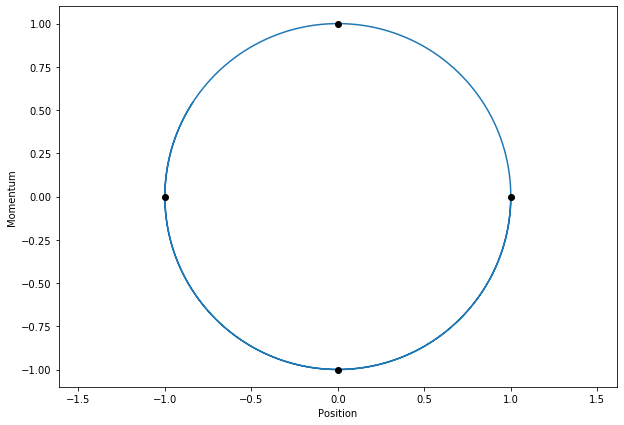

In [5]:
#Plot
plt.figure(figsize=[10,7])
plt.axis('equal')
plt.plot(q1_t,p1_t) #Generate a plot
plt.plot([0,0,-q1_t[0],q1_t[0]],[-np.sqrt(k*m)*q1_t[0],np.sqrt(k*m)*q1_t[0],0,0],'ko') #Plot the intercepts to check our function
plt.xlabel('Position')
plt.ylabel('Momentum')
plt.show()                      #Show the plot

*Textbook used is Classical Dynamics by Thornton & Marion.*